<a href="https://colab.research.google.com/github/varunraj42/CodeBasics/blob/DataScience/Logisitc_Reg_CodeBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%matplotlib inline

In [82]:
from google.colab import drive

In [83]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [84]:
os.chdir('/content/gdrive/MyDrive/')
# os.makedirs('CodeBasics')
os.listdir('CodeBasics')
os.chdir('/content/gdrive/MyDrive/CodeBasics')

In [85]:
data_file = 'HR_comma_sep.csv'

In [86]:
data = pd.read_csv(data_file, header=0)
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Attrition Stats. Based on Total Projects

In [262]:
total_projects = data.number_project.unique().tolist()
total_projects.sort()
data_left = [(len(data.loc[(data.number_project==total) & (data.left==1)])/len(data))*100 for total in total_projects]
data_stay = [(len(data.loc[(data.number_project==total) & (data.left==0)])/len(data))*100 for total in total_projects]

In [263]:
X = np.arange(len(data_left))

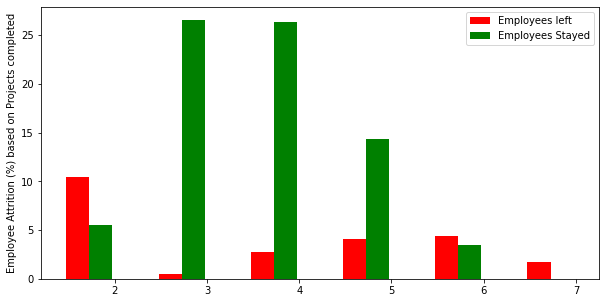

In [264]:
plt.figure(figsize=(10, 5))
plt.bar(X, data_left, color='red', width=0.25)
plt.bar(X+0.25, data_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(total_projects))], total_projects)
plt.ylabel('Employee Attrition (%) based on Projects completed')
plt.legend(['Employees left', 'Employees Stayed'])

# Attrition Stats. Based on Tenure

In [223]:
tenure_cat = data.time_spend_company.unique().tolist()
data_left = [(len(data.loc[(data.time_spend_company==tenure) & (data.left==1)])/len(data))*100 for tenure in tenure_cat]
data_stay = [(len(data.loc[(data.time_spend_company==tenure) & (data.left==0)])/len(data))*100 for tenure in tenure_cat]

In [224]:
X = np.arange(len(data_left))

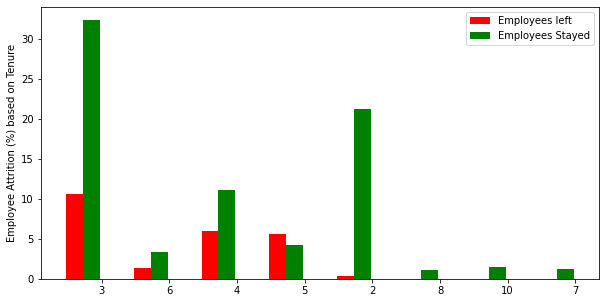

In [225]:
plt.figure(figsize=(10, 5))
plt.bar(X, data_left, color='red', width=0.25)
plt.bar(X+0.25, data_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(tenure_cat))], tenure_cat)
plt.ylabel('Employee Attrition (%) based on Tenure')
plt.legend(['Employees left', 'Employees Stayed'])

# Attrition Stats. Based on Salary

In [226]:
sal_ranges = data.salary.unique().tolist()
data_left = [(len(data.loc[(data.salary==sal) & (data.left==1)])/len(data))*100 for sal in sal_ranges]
data_stay = [(len(data.loc[(data.salary==sal) & (data.left==0)])/len(data))*100 for sal in sal_ranges]

In [227]:
X = np.arange(len(data_left))

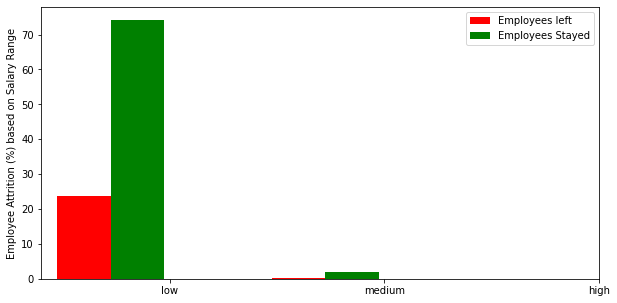

In [240]:
plt.figure(figsize=(10, 5))
plt.bar(X, data_left, color='red', width=0.25)
plt.bar(X+0.25, data_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(sal_ranges))], sal_ranges)
plt.ylabel('Employee Attrition (%) based on Salary Range')
plt.legend(['Employees left', 'Employees Stayed'])

# Attrition Stats. Based on Promotion

In [233]:
promotion_cat = data.promotion_last_5years.unique().tolist()
data_left = [(len(data.loc[(data.promotion_last_5years==promo) & (data.left==1)])/len(data))*100 for promo in promotion_cat]
data_stay = [(len(data.loc[(data.promotion_last_5years==promo) & (data.left==0)])/len(data))*100 for promo in promotion_cat]

In [234]:
promotion_cat

[0, 1]

In [236]:
X = np.arange(len(data_left))

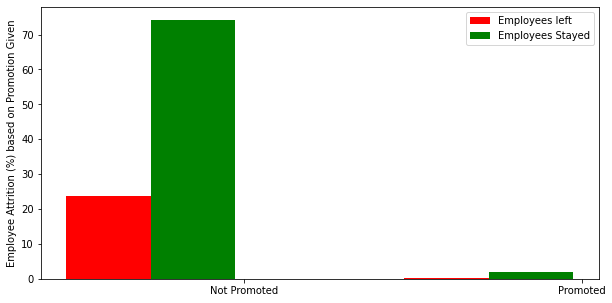

In [241]:
plt.figure(figsize=(10, 5))
plt.bar(X, data_left, color='red', width=0.25)
plt.bar(X+0.25, data_stay, color='green', width=0.25)
promotion_cat = ['Not Promoted', 'Promoted']
plt.xticks([i + 0.4 for i in range(len(promotion_cat))], promotion_cat)
plt.ylabel('Employee Attrition (%) based on Promotion Given')
plt.legend(['Employees left', 'Employees Stayed'])

# Attrition Rate by Department

In [242]:
data_left = data.loc[data.left==1]
data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

# Attrition Rate between Departments

In [243]:
depts = data.Department.unique().tolist()
dept_left = [(len(data.loc[(data.Department==dept) & (data.left==1)])/len(data))*100 for dept in data.Department.unique()]
dept_stay = [(len(data.loc[(data.Department==dept) & (data.left==0)])/len(data))*100 for dept in data.Department.unique()]

In [244]:
X = np.arange(len(dept_left))

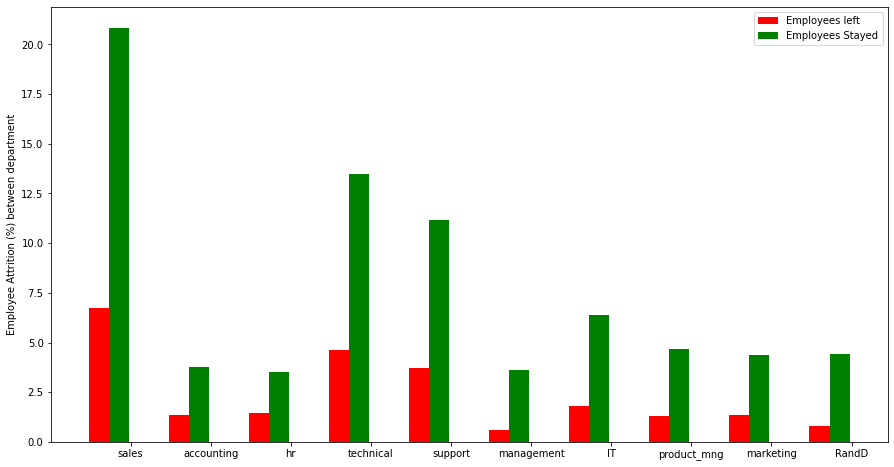

In [245]:
plt.figure(figsize=(15, 8))
plt.bar(X, dept_left, color='red', width=0.25)
plt.bar(X+0.25, dept_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(depts))], depts)
plt.ylabel('Employee Attrition (%) between department')
plt.legend(['Employees left', 'Employees Stayed'])

In [246]:
# Attrition Rate Within Departments

In [247]:
dept_dict = dict()
for dept in data.Department.unique():
  dept_dict[dept] = len(data.loc[data.Department == dept])
dept_dict

{'IT': 1227,
 'RandD': 787,
 'accounting': 767,
 'hr': 739,
 'management': 630,
 'marketing': 858,
 'product_mng': 902,
 'sales': 4140,
 'support': 2229,
 'technical': 2720}

In [248]:
dept_left = [round((len(data.loc[(data.Department==dept) & (data.left==1)])/dept_dict[dept])*100, 0) for dept in data.Department.unique()]
dept_stay = [round((len(data.loc[(data.Department==dept) & (data.left==0)])/dept_dict[dept])*100, 0) for dept in data.Department.unique()]

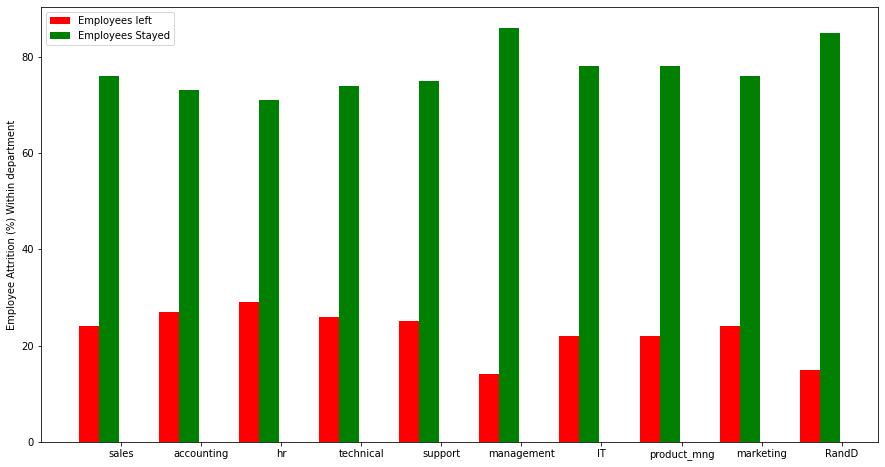

In [249]:
plt.figure(figsize=(15, 8))
plt.bar(X, dept_left, color='red', width=0.25)
plt.bar(X+0.25, dept_stay, color='green', width=0.25)
plt.xticks([i + 0.4 for i in range(len(depts))], depts)
plt.ylabel('Employee Attrition (%) Within department')
plt.legend(['Employees left', 'Employees Stayed'])